In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [32]:
admin_us_all = u'/Users/ryanlambert/Downloads/admins_users all apps with Support.csv'
support_only = '/Users/ryanlambert/Downloads/support_only.csv'

support_only = pd.DataFrame.from_csv(support_only)
admin_us_all = pd.read_csv(open('/Users/ryanlambert/Downloads/admins_users all apps with Support.csv', 'rU'), engine='c')

In [11]:
support_only

,user_count,num_admins
name,,
Jexia,112,8
Grabble,75024,13
Flickitt,10,2
ActionIQ,3,9
cvmail,180,10
Merchbar,54171,10
Vendorable,35,4
bitmovin,4897,10
ReSchedule Med,4,1


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


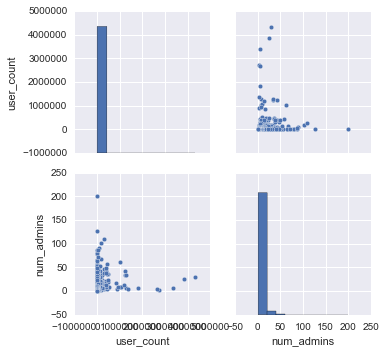

In [35]:
sns.pairplot(admin_us_all)

(0, 100000.0)

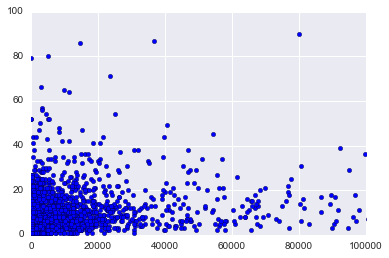

In [59]:
plt.scatter(admin_us_all['user_count'], admin_us_all['num_admins'])
plt.ylim([0, 100])
plt.xlim([0, 1e5])

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

In [191]:
admin_us_all = admin_us_all[['num_admins', 'user_count']]

Linear Regression no good

[ -2.23522251e-01  -2.35419611e-02  -1.55884838e-03  -4.36698564e-02
  -3.33108722e-02  -7.37269190e-03  -4.25821490e-02  -9.86312718e-02
  -4.26983939e+00  -4.59538455e+00] 
mean is:  -0.93394138502


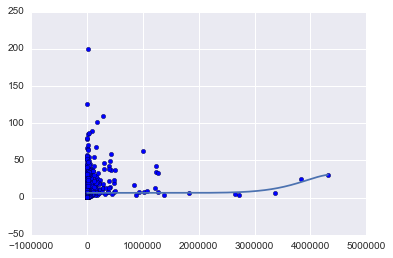

In [162]:
est = make_pipeline(PolynomialFeatures(11), LinearRegression())
model = est.fit(admin_us_all['user_count'].reshape(-1, 1), admin_us_all['num_admins'].reshape(-1,1))
plt.scatter(admin_us_all['user_count'], admin_us_all['num_admins'])
x_space = np.linspace(0, admin_us_all['user_count'].max(), 1000).reshape(-1, 1)
y_pred = est.predict(x_space)

plt.plot(x_space, y_pred)


scores = cross_validation.cross_val_score(
    est, admin_us_all['user_count'].reshape(-1,1), admin_us_all['num_admins'],
cv=10)
print scores, '\nmean is: ', np.mean(scores)

In [98]:
np.mean(scores)

-0.89893721741448385

Let's try a naive bayes classifier

In [271]:
def try_model(model, df):
    est = make_pipeline(model())
    model = est.fit(df['user_count'].reshape(-1, 1), df['num_admins'].reshape(-1,1))
    x_space = np.linspace(0, df['user_count'].max(), 1000).reshape(-1, 1)
    y_pred = est.predict(x_space)



    scores = cross_validation.cross_val_score(est, df['user_count'].reshape(-1,1), df['num_admins'], cv=10)
    
    print scores, '\nmean is: ', np.mean(scores)
    return x_space, y_pred

In [297]:
def try_poly(n, df):
    est = make_pipeline(PolynomialFeatures(n), LinearRegression())
    model = est.fit(df['user_count'].reshape(-1, 1), df['num_admins'].reshape(-1,1))
    x_space = np.linspace(0, df['user_count'].max(), 1000).reshape(-1, 1)
    y_pred = est.predict(x_space)

    scores = cross_validation.cross_val_score(est, df['user_count'].reshape(-1,1), df['num_admins'], cv=10)
    
    print scores, '\nmean is: ', np.mean(scores)
    return x_space, y_pred

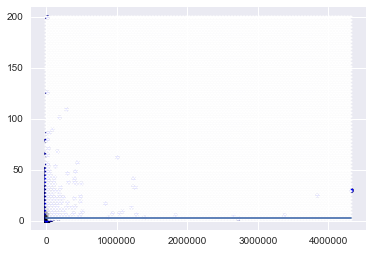

In [148]:
plt.scatter(admin_us_all['user_count'], admin_us_all['num_admins'])
plt.plot(x_space, y_pred)
# plt.xlim([6e4, 8e4])
# plt.ylim([0, 100])
plt.hexbin(admin_us_all['user_count'], admin_us_all['num_admins'])

Ok we will split into "big companies and small companies

(0, 100000.0)

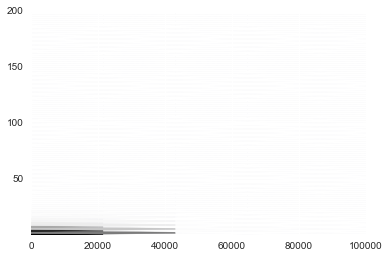

In [150]:
plt.hexbin(admin_us_all['user_count'], admin_us_all['num_admins'])
plt.xlim([0, 1e5])

In [177]:
from sklearn.svm import SVC

In [188]:
df = pd.DataFrame({"a": np.random.random(100),
                       "b": np.random.random(100),
                       "id": np.arange(100)})

# Bin the data frame by "a" with 10 bins...
bins = np.linspace(df.a.min(), df.a.max(), 10)
groups = df.groupby(np.digitize(df.a, bins))

Let's add a feature that sort of quantifies what group of business you belong to.  

There are businesses that have many users per admin.  We should consider this fact.  

In [193]:
admin_us_all['ad_per_us'] = admin_us_all['user_count'] / admin_us_all['num_admins']

In [230]:
bins = np.linspace(admin_us_all['ad_per_us'].min(), admin_us_all['ad_per_us'].max(), 1000)
groups = admin_us_all.groupby(np.digitize(admin_us_all['ad_per_us'], bins), as_index=False)

In [231]:
for i, df in groups:
    print len(df)

5117
470
207
122
73
49
29
14
27
25
8
12
12
8
5
8
5
5
3
4
2
2
3
3
2
1
3
1
1
1
2
1
3
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


We log binned them into seperate bins based on "Admins" per User

In [285]:
bins = np.logspace(admin_us_all['ad_per_us'].min(), admin_us_all['ad_per_us'].max(), 2)
groups = admin_us_all.groupby(np.digitize(admin_us_all['ad_per_us'], bins), as_index=False)
for i, df in groups:
    print len(df)

227
6031


In [291]:
groups.mean()

,num_admins,user_count,ad_per_us
0,3.872247,1.400881,0.197710
1,6.432930,12315.012104,1595.497878


[ 0.3030303   0.35714286  0.4         0.54545455  0.52380952  0.57142857
  0.5         0.52631579  0.52631579  0.57894737] 
mean is:  0.483244474823


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


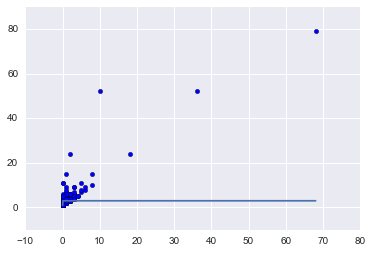

[ 0.13157895  0.13709677  0.13843648  0.14026403  0.14119601  0.14285714
  0.14333895  0.14310051  0.14334471  0.1443299 ] 
mean is:  0.140554345854


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


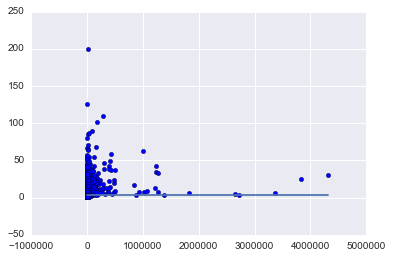

In [293]:
for i, df in groups: 
    try:
        x_space, y_pred = try_model(naive_bayes.BernoulliNB, df)
    except ValueError:
        print "nothing to see here"
    plt.scatter(df['user_count'], df['num_admins'])
    plt.plot(x_space, y_pred)
    plt.show()

In [309]:
bins = np.logspace(admin_us_all['ad_per_us'].min(), admin_us_all['ad_per_us'].max()/100000, 10)
groups = admin_us_all.groupby(np.digitize(admin_us_all['ad_per_us'], bins), as_index=False)
for i, df in groups:
    print len(df)

227
784
1962
2257
920
96
12


Let's try linear Regression again

In [312]:
bins

array([  1.00000000e+00,   1.01819188e+01,   1.03671471e+02,
         1.05557450e+03,   1.07477738e+04,   1.09432960e+05,
         1.11423752e+06,   1.13450759e+07,   1.15514642e+08,
         1.17616071e+09])

[ 0.14831099  0.57110898  0.87701384  0.13838619  0.92162746 -0.17817262
 -0.35548384 -0.050994    0.31013554 -0.0223648 ] 
mean is:  0.235956773546


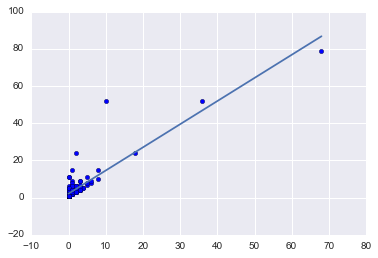

[ 0.75237919  0.73506249  0.79277261  0.64226388  0.75489633  0.47324522
  0.4307209   0.47838492  0.36898255  0.30956921] 
mean is:  0.573827729316


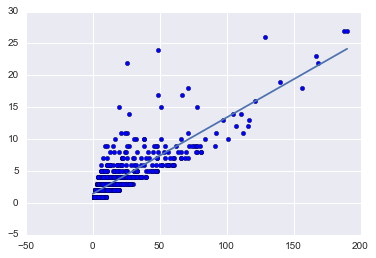

[ 0.68319967  0.76291509  0.50115678  0.6113589   0.53133458  0.78477772
  0.95313315  0.48432278  0.08501967  0.15122033] 
mean is:  0.554843867382


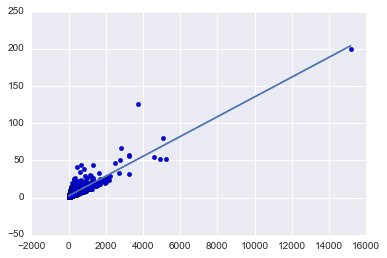

[ 0.67768424  0.38001675  0.43829965  0.46830601  0.62450773  0.50784496
  0.57256109  0.53723327 -0.82498941 -0.73289401] 
mean is:  0.264857027046


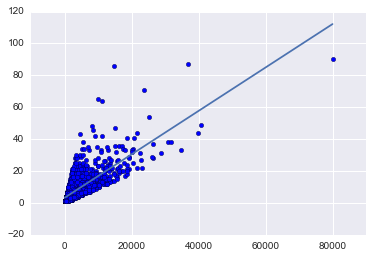

[ 0.44825294  0.41137839  0.468008    0.69684738  0.5538362   0.38271644
  0.25906447  0.54013581 -0.38904931 -1.35330118] 
mean is:  0.201788914726


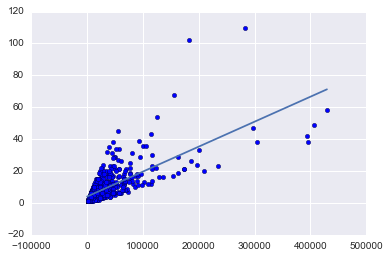

[ 0.39056712  0.36057239  0.20092516  0.49807852  0.63321594  0.92412423
  0.85776194 -1.59726964  0.12934431 -0.40655267] 
mean is:  0.199076728777


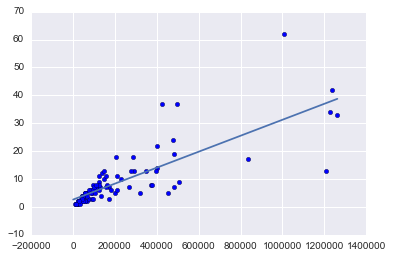

[-0.04520356  0.29080613  0.          0.          0.          0.          0.
  0.          0.          0.        ] 
mean is:  0.0245602576619


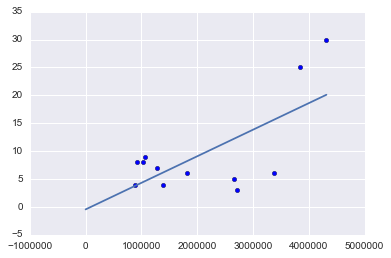

In [311]:
for i, df in groups: 
    try:
        x_space, y_pred = try_poly(1, df)
    except ValueError:
        print "nothing to see here"
    plt.scatter(df['user_count'], df['num_admins'])
    plt.plot(x_space, y_pred)
    plt.show()

In [315]:
ad_us_more1 = admin_us_all[admin_us_all['ad_per_us'] > 1]

[ -2.38094567e-02   5.69782775e-03   1.83411647e-02   9.31336216e-03
  -1.18838472e-02   3.66622693e-03  -2.76514635e-02   7.72703083e-03
  -4.48361267e+00  -4.59962017e+00] 
mean is:  -0.910183199863


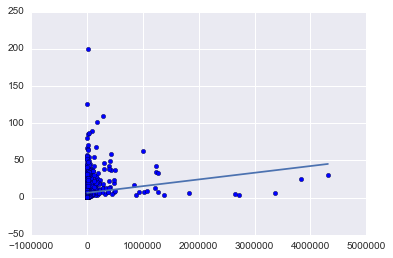

In [317]:
x_space, y_pred = try_poly(1, ad_us_more1)
plt.scatter(ad_us_more1['user_count'], ad_us_more1['num_admins'])
plt.plot(x_space, y_pred)
plt.show()